In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def Analyse(self, name, n):
        # authenticating
        consumerKey = '1X2SkRnFZCIGd4VZmGtUbyKPD'
        consumerSecret = 'UIQkoJZ1dqzvSm7cndAXE6hdVzOrwOqSLVtFP0JwnTKYIbWBp6'
        accessToken = '834095173348909057-KNMZpB12pJS72fGmdoij4OVCGVoBvLY'
        accessTokenSecret = 't7Dru6smFkrYkXPwosMm69BVXuBSFTc1jtnL0633ZtNAJ'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = name
        numTweets = n
        print('Enter which place to fetch tweets from: ', name)
        print('Enter how many tweets to search: ', n)
        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q="place:%s" % searchTerm, lang = "en").items(numTweets)

        # Open/create a file to append data to
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, numTweets)
        wpositive = self.percentage(wpositive, numTweets)
        spositive = self.percentage(spositive, numTweets)
        negative = self.percentage(negative, numTweets)
        wnegative = self.percentage(wnegative, numTweets)
        snegative = self.percentage(snegative, numTweets)
        neutral = self.percentage(neutral, numTweets)

        # finding average reaction
        polarity = polarity / numTweets

        # printing out data
        print("How people are feeling in " + searchTerm + " by analyzing " + str(numTweets) + " tweets:")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people feel positive")
        print(str(wpositive) + "% people feel weakly positive")
        print(str(spositive) + "% people feel strongly positive")
        print(str(negative) + "% people feel negative")
        print(str(wnegative) + "% people feel weakly negative")
        print(str(snegative) + "% people feel strongly negative")
        print(str(neutral) + "% people feel neutral")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, numTweets)
        return [negative, snegative, name]

    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

In [3]:
def main(name, n):
    sa = SentimentAnalysis()
    return sa.Analyse(name, n)

Enter which place to fetch tweets from:  Mumbai
Enter how many tweets to search:  50
How people are feeling in Mumbai by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
2.00% people feel positive
16.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
6.00% people feel neutral


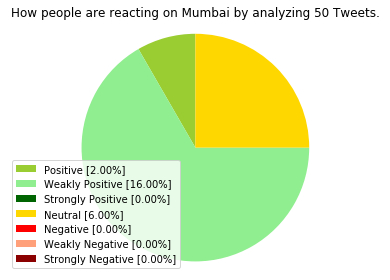

Enter which place to fetch tweets from:  Delhi
Enter how many tweets to search:  50
How people are feeling in Delhi by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
22.00% people feel positive
12.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
16.00% people feel weakly negative
0.00% people feel strongly negative
44.00% people feel neutral


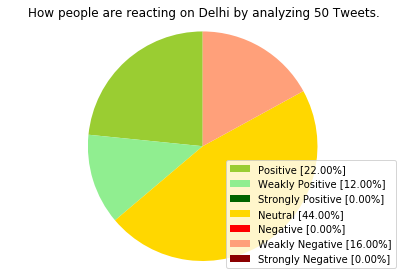

Enter which place to fetch tweets from:  Bagalore
Enter how many tweets to search:  50
How people are feeling in Bagalore by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
0.00% people feel neutral


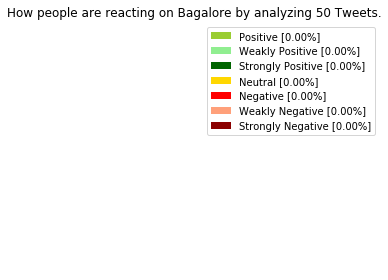

Enter which place to fetch tweets from:  Hyderabad
Enter how many tweets to search:  50
How people are feeling in Hyderabad by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
4.00% people feel positive
0.00% people feel weakly positive
2.00% people feel strongly positive
2.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
10.00% people feel neutral


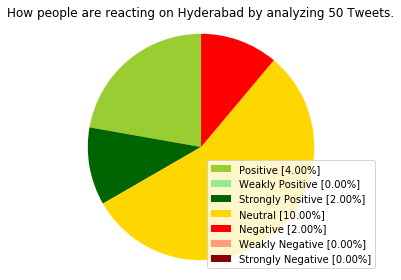

Enter which place to fetch tweets from:  Ahmedabad
Enter how many tweets to search:  50
How people are feeling in Ahmedabad by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
2.00% people feel neutral


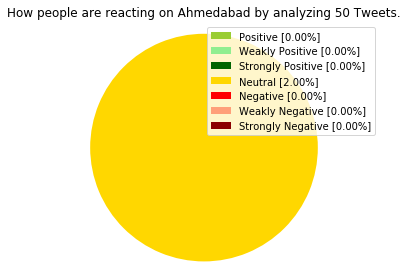

Enter which place to fetch tweets from:  Chennai
Enter how many tweets to search:  50
How people are feeling in Chennai by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
4.00% people feel positive
4.00% people feel weakly positive
0.00% people feel strongly positive
2.00% people feel negative
2.00% people feel weakly negative
0.00% people feel strongly negative
18.00% people feel neutral


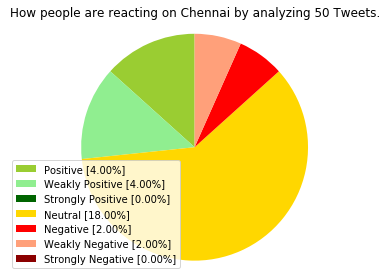

Enter which place to fetch tweets from:  Kolkata
Enter how many tweets to search:  50
How people are feeling in Kolkata by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
0.00% people feel positive
2.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
18.00% people feel neutral


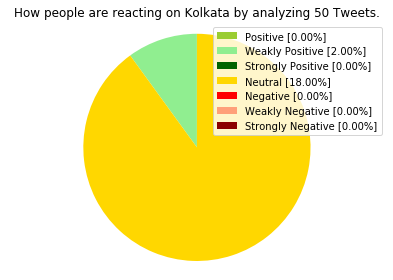

Enter which place to fetch tweets from:  Surat
Enter how many tweets to search:  50
How people are feeling in Surat by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
2.00% people feel neutral


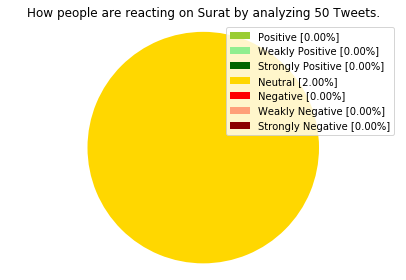

Enter which place to fetch tweets from:  Pune
Enter how many tweets to search:  50
How people are feeling in Pune by analyzing 50 tweets:

General Report: 
Weakly Negative

Detailed Report: 
4.00% people feel positive
6.00% people feel weakly positive
0.00% people feel strongly positive
2.00% people feel negative
0.00% people feel weakly negative
4.00% people feel strongly negative
24.00% people feel neutral


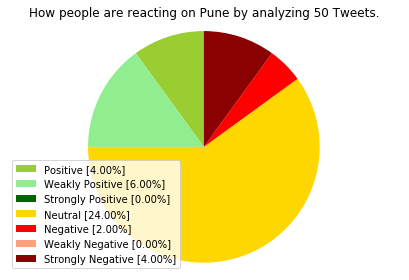

Enter which place to fetch tweets from:  Jaipur
Enter how many tweets to search:  50
How people are feeling in Jaipur by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
2.00% people feel neutral


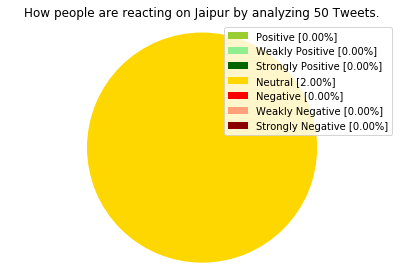

Enter which place to fetch tweets from:  Agra
Enter how many tweets to search:  50
How people are feeling in Agra by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
4.00% people feel positive
2.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
8.00% people feel neutral


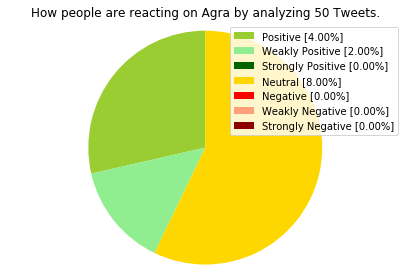

Enter which place to fetch tweets from:  Srinagar
Enter how many tweets to search:  50
How people are feeling in Srinagar by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
0.00% people feel positive
4.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
2.00% people feel neutral


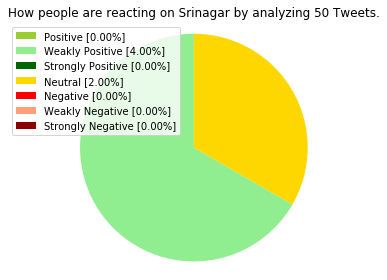

Enter which place to fetch tweets from:  Amritsar
Enter how many tweets to search:  50
How people are feeling in Amritsar by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
0.00% people feel neutral


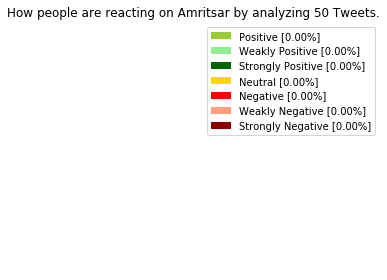

Enter which place to fetch tweets from:  Chandigarh
Enter how many tweets to search:  50
How people are feeling in Chandigarh by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
0.00% people feel neutral


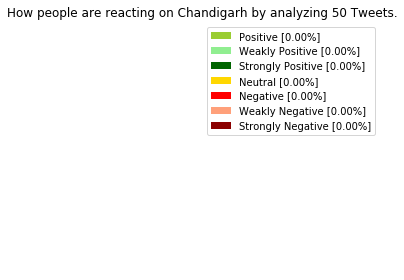

Enter which place to fetch tweets from:  Ranchi
Enter how many tweets to search:  50
How people are feeling in Ranchi by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
2.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
6.00% people feel neutral


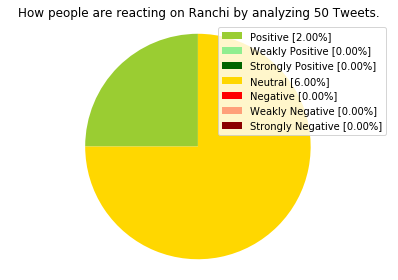

Enter which place to fetch tweets from:  Chandigarh
Enter how many tweets to search:  50
How people are feeling in Chandigarh by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
0.00% people feel neutral


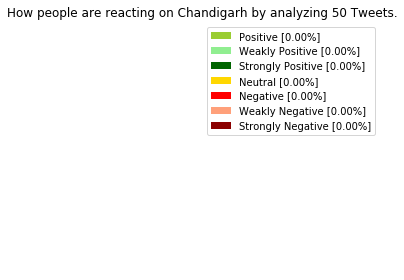

Enter which place to fetch tweets from:  Gurugram
Enter how many tweets to search:  50
How people are feeling in Gurugram by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
0.00% people feel neutral


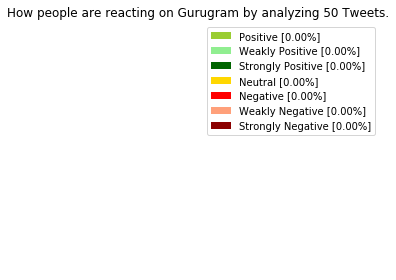

Enter which place to fetch tweets from:  Aligarh
Enter how many tweets to search:  50
How people are feeling in Aligarh by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
4.00% people feel neutral


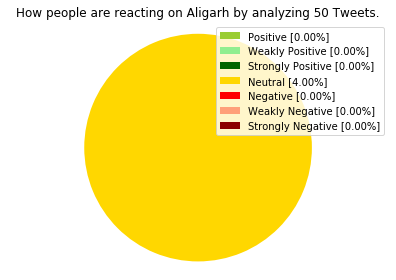

Enter which place to fetch tweets from:  Noida
Enter how many tweets to search:  50
How people are feeling in Noida by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
0.00% people feel positive
42.00% people feel weakly positive
8.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
0.00% people feel neutral


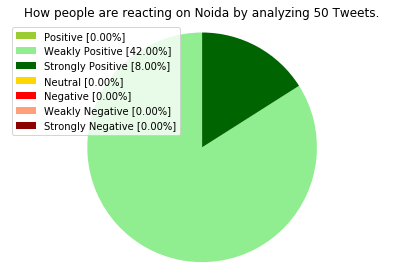

Enter which place to fetch tweets from:  Dehradun
Enter how many tweets to search:  50
How people are feeling in Dehradun by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
2.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
26.00% people feel neutral


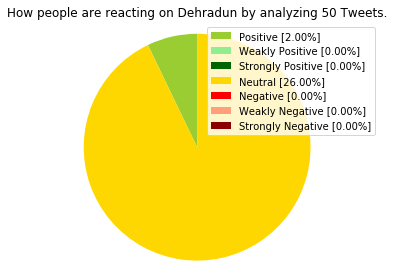

Enter which place to fetch tweets from:  Jhansi
Enter how many tweets to search:  50
How people are feeling in Jhansi by analyzing 50 tweets:

General Report: 
Weakly Positive

Detailed Report: 
2.00% people feel positive
2.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
0.00% people feel neutral


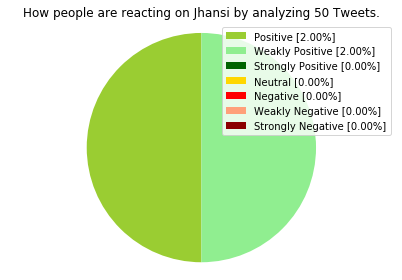

Enter which place to fetch tweets from:  Udiapur
Enter how many tweets to search:  50
How people are feeling in Udiapur by analyzing 50 tweets:

General Report: 
Neutral

Detailed Report: 
0.00% people feel positive
0.00% people feel weakly positive
0.00% people feel strongly positive
0.00% people feel negative
0.00% people feel weakly negative
0.00% people feel strongly negative
0.00% people feel neutral


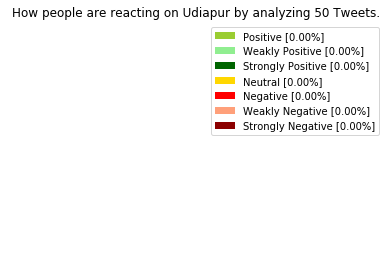

[['0.00' '0.00' 'Mumbai']
 ['0.00' '0.00' 'Dehradun']
 ['0.00' '0.00' 'Noida']
 ['0.00' '0.00' 'Aligarh']
 ['0.00' '0.00' 'Gurugram']
 ['0.00' '0.00' 'Chandigarh']
 ['0.00' '0.00' 'Ranchi']
 ['0.00' '0.00' 'Chandigarh']
 ['0.00' '0.00' 'Amritsar']
 ['0.00' '0.00' 'Srinagar']
 ['0.00' '0.00' 'Agra']
 ['0.00' '0.00' 'Jaipur']
 ['0.00' '0.00' 'Surat']
 ['0.00' '0.00' 'Kolkata']
 ['2.00' '0.00' 'Chennai']
 ['0.00' '0.00' 'Ahmedabad']
 ['2.00' '0.00' 'Hyderabad']
 ['0.00' '0.00' 'Bagalore']
 ['0.00' '0.00' 'Delhi']
 ['0.00' '0.00' 'Jhansi']
 ['0.00' '0.00' 'Udiapur']
 ['2.00' '4.00' 'Pune']]
First 3 highly negative cities are:  Pune , Udiapur , Jhansi


In [6]:
list = ['Mumbai'
,'Delhi'
,'Bagalore'
,'Hyderabad'
,'Ahmedabad'
,'Chennai'
,'Kolkata'
,'Surat'
,'Pune'
,'Jaipur'
,'Agra'
,'Srinagar'
,'Amritsar'
,'Chandigarh'
,'Ranchi'
,'Chandigarh'
,'Gurugram'
,'Aligarh'
,'Noida'
,'Dehradun'
,'Jhansi'
,'Udiapur']

losses = []
for item in list:
    losses.append(main(item, 50))
losses = np.array(losses)
ans = losses[losses[:,0].argsort()]
final_ans = losses[losses[:,1].argsort()]
print("These Need physiologist : ", final_ans[len(final_ans) - 1][2],',',final_ans[len(final_ans) - 2][2],',',final_ans[len(final_ans) - 3][2] )